In [5]:
import sys
!{sys.executable} -m pip install json_stream
import numpy as np
import pandas as pd
import json_stream
import json
import matplotlib.pyplot as plt

In [6]:
with open("dawn-event-data.json") as f:
    data = json.load(f)
    print(len(data))
    print("DONE!")

11058699
DONE!


In [7]:
print(data[0])

{'time': 1664339224992, 'userId': 1, 'platform': 'android', 'position': [168.97, 100.03, -411.21], 'country': 'CN', 'events': {'ping': 1}}


In [12]:
start_times = {}
for skyevent in data:
    ID = skyevent["userId"]
    if ID not in start_times.keys():
        start_times[ID] = skyevent["time"]

In [16]:
end_times = {}
for i in reversed(range(len(data))):
    skyevent = data[i]
    ID = skyevent["userId"]
    if ID not in end_times.keys():
        end_times[ID] = skyevent["time"]

In [17]:
level_times = {}
for ID in start_times.keys():
    level_times[ID] = end_times[ID] - start_times[ID]

(array([6.1394e+04, 2.2020e+03, 1.4820e+03, 1.0930e+03, 7.9600e+02,
        5.2200e+02, 3.2600e+02, 1.4800e+02, 9.6000e+01, 5.4000e+01]),
 array([   0.        ,  107.25494167,  214.50988333,  321.764825  ,
         429.01976667,  536.27470833,  643.52965   ,  750.78459167,
         858.03953333,  965.294475  , 1072.54941667]),
 <BarContainer object of 10 artists>)

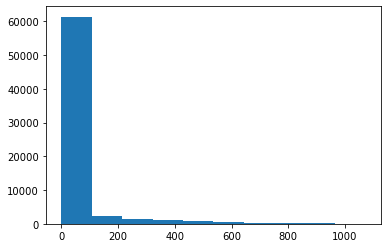

In [44]:
values = list(level_times.values())
values = np.multiply(1/60000, values)
plt.hist(values)

In [70]:
filtered_values = list(filter(lambda x: (x < 60 and x != 0), values))


(array([3309., 2456., 2615., 2906., 2341., 2292., 2290., 2264., 2244.,
        2344., 2282., 2077., 1845., 1669., 1494., 1304., 1183., 1186.,
        1053.,  937.,  836.,  833.,  698.,  701.,  842.,  967., 1039.,
        1031.,  982.,  878.,  793.,  683.,  566.,  507.,  418.,  374.,
         341.,  320.,  272.,  252.,  227.,  232.,  201.,  206.,  172.,
         179.,  145.,  152.,  140.,  134.,  127.,  126.,  114.,  106.,
          89.,  105.,  115.,   95.,  100.,   87.,   95.,   84.,   72.,
          71.,   83.,   67.,   76.,   53.,   64.,   48.,   67.,   67.,
          63.,   38.,   43.,   48.,   45.,   50.,   58.,   38.,   36.,
          42.,   38.,   41.,   52.,   39.,   37.,   34.,   29.,   51.,
          36.,   38.,   33.,   42.,   37.,   45.,   45.,   30.,   28.,
          28.]),
 array([1.66666667e-05, 5.99997167e-01, 1.19997767e+00, 1.79995817e+00,
        2.39993867e+00, 2.99991917e+00, 3.59989967e+00, 4.19988017e+00,
        4.79986067e+00, 5.39984117e+00, 5.99982167e+00, 6.

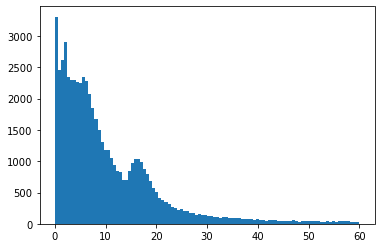

In [71]:
plt.hist(filtered_values, 100)